### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import pathlib

from joblib import load

import matplotlib.pyplot as plt
import seaborn as sns

### Interpret best model

In [2]:
# results dir for loading/saving
results_dir = pathlib.Path("results/")

log_reg_model_path = pathlib.Path(f"{results_dir}/1.log_reg_model.joblib")
log_reg_model = load(log_reg_model_path)

### Compile Coefficients Matrix

In [3]:
coefs = np.abs(log_reg_model.coef_)
coefs = pd.DataFrame(coefs).T
coefs.columns = log_reg_model.classes_

print(coefs.shape)
coefs.head()

(1280, 15)


,Apoptosis,Artefact,Binuclear,Elongated,Folded,Grape,Hole,Interphase,Large,Metaphase,MetaphaseAlignment,Polylobed,Prometaphase,SmallIrregular,UndefinedCondensed
0,0.025007,0.036504,0.042441,0.007339,0.034018,0.031693,0.031753,0.059763,0.026582,0.006113,0.033197,0.067686,0.036498,0.074616,0.004322
1,0.005332,0.006294,0.051360,0.009156,0.061005,0.014748,0.021047,0.086332,0.008748,0.010420,0.008042,0.086284,0.011182,0.040398,0.008473
2,0.032384,0.090655,0.003506,0.009099,0.012852,0.006085,0.013811,0.048513,0.010934,0.002512,0.037540,0.092060,0.041422,0.055317,0.020313
3,0.004952,0.032503,0.076041,0.026946,0.004057,0.019759,0.055008,0.149051,0.005835,0.031708,0.034431,0.065662,0.007167,0.008218,0.002037
4,0.055938,0.077938,0.097862,0.011576,0.011248,0.009159,0.035015,0.022198,0.007351,0.068092,0.008298,0.059645,0.022289,0.078985,0.004262


### Diagrams for interpreting coefficients

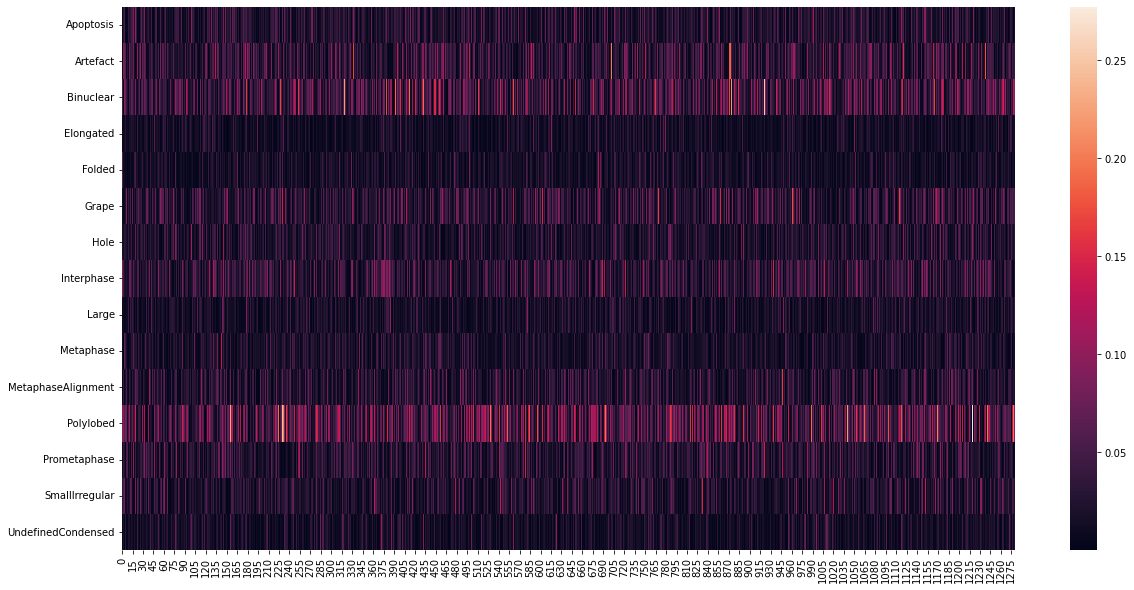

In [4]:
# display heatmap of average coefs
plt.figure(figsize=(20, 10))
ax = sns.heatmap(data=coefs.T)

/home/roshankern/anaconda3/envs/2.ML_phenotypic_classification/lib/python3.8/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


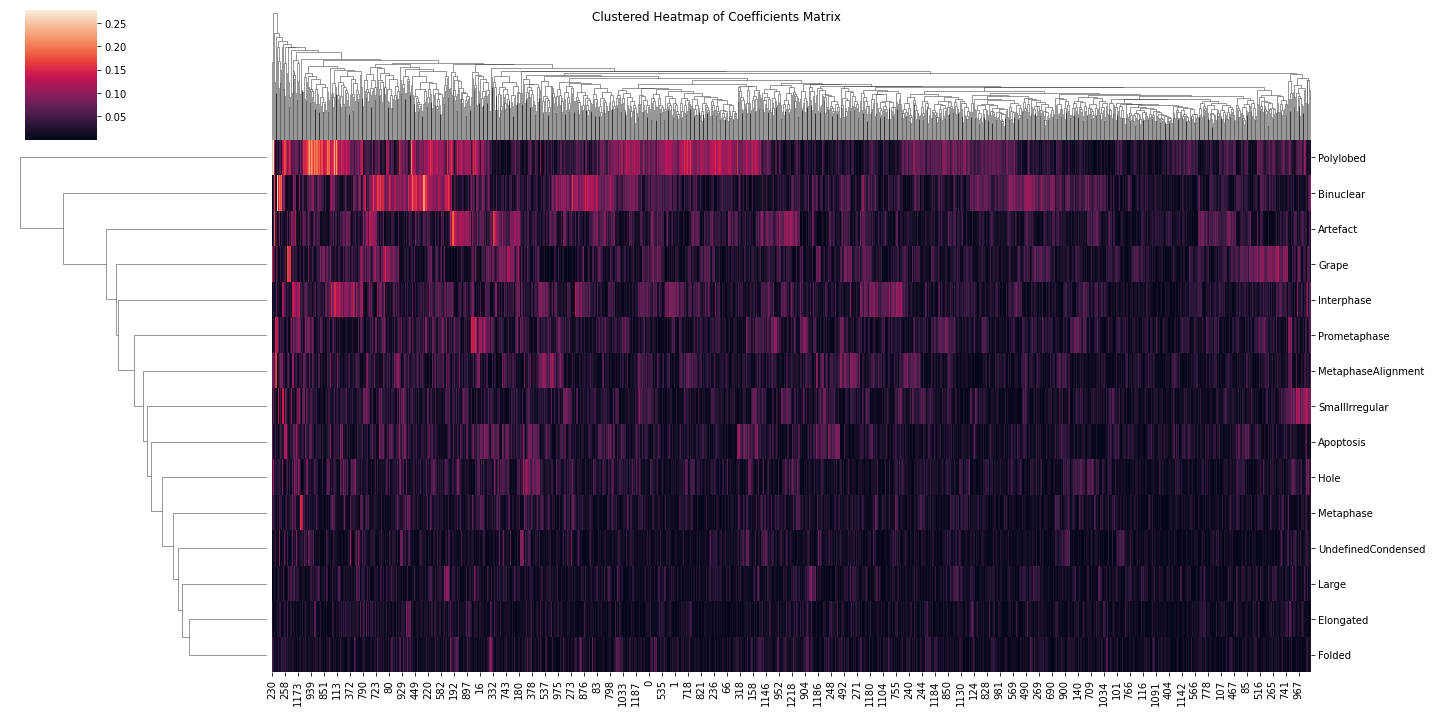

In [5]:
# display clustered heatmap of coefficients
ax = sns.clustermap(data=coefs.T, figsize=(20, 10), row_cluster=True, col_cluster=True)
ax = ax.fig.suptitle("Clustered Heatmap of Coefficients Matrix")

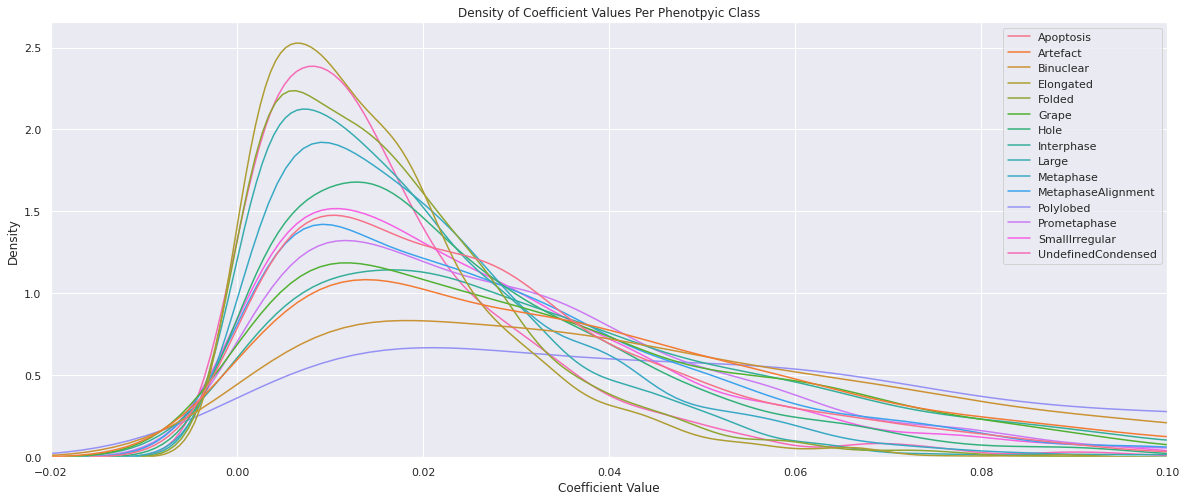

In [6]:
# display density plot for coefficient values of each class
sns.set(rc={"figure.figsize": (20, 8)})
plt.xlim(-0.02, 0.1)
plt.xlabel("Coefficient Value")
plt.ylabel("Density")
plt.title("Density of Coefficient Values Per Phenotpyic Class")
ax = sns.kdeplot(data=coefs)

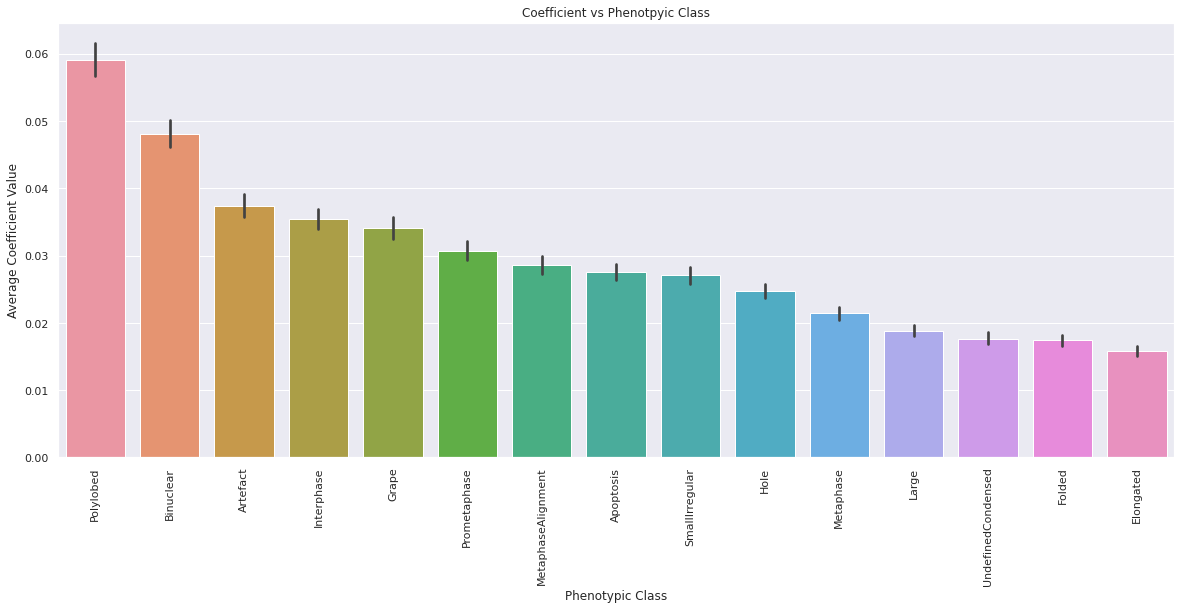

In [7]:
# display average coefficient value vs phenotypic class bar chart
pheno_class_ordered = coefs.reindex(
    coefs.mean().sort_values(ascending=False).index, axis=1
)
sns.set(rc={"figure.figsize": (20, 8)})
plt.xlabel("Phenotypic Class")
plt.ylabel("Average Coefficient Value")
plt.title("Coefficient vs Phenotpyic Class")
plt.xticks(rotation=90)
ax = sns.barplot(data=pheno_class_ordered)

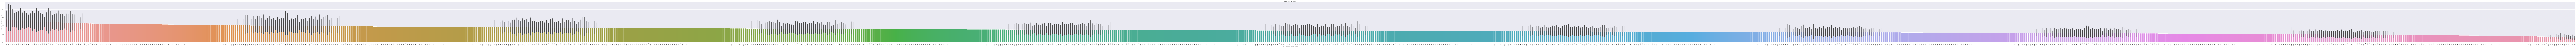

In [8]:
# display average coefficient value vs feature bar chart
feature_ordered = coefs.T.reindex(
    coefs.T.mean().sort_values(ascending=False).index, axis=1
)
sns.set(rc={"figure.figsize": (500, 8)})
plt.xlabel("Deep Learning Feature Number")
plt.ylabel("Average Coefficient Value")
plt.title("Coefficient vs Feature")
plt.xticks(rotation=90)
ax = sns.barplot(data=feature_ordered)

### Interpret shuffled baseline model

In [9]:
# results dir for loading/saving
results_dir = pathlib.Path("results/")

shuffled_baseline_log_reg_model_path = pathlib.Path(f"{results_dir}/1.shuffled_baseline_log_reg_model.joblib")
shuffled_baseline_log_reg_model = load(shuffled_baseline_log_reg_model_path)

### Compile Coefficients Matrix

In [10]:
coefs = np.abs(shuffled_baseline_log_reg_model.coef_)
coefs = pd.DataFrame(coefs).T
coefs.columns = shuffled_baseline_log_reg_model.classes_

print(coefs.shape)
coefs.head()

(1280, 15)


,Apoptosis,Artefact,Binuclear,Elongated,Folded,Grape,Hole,Interphase,Large,Metaphase,MetaphaseAlignment,Polylobed,Prometaphase,SmallIrregular,UndefinedCondensed
0,0.014404,0.061899,0.046512,0.019459,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.041709,0.000000,0.0,0.0
1,0.007023,0.011032,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
2,0.000000,0.024860,0.002401,0.000000,0.0,0.000000,0.0,0.006442,0.0,0.0,0.0,0.020656,0.024122,0.0,0.0
3,0.000000,0.000000,0.000820,0.000000,0.0,0.011493,0.0,0.004554,0.0,0.0,0.0,0.000000,0.018539,0.0,0.0
4,0.000000,0.000000,0.027232,0.000000,0.0,0.000000,0.0,0.017536,0.0,0.0,0.0,0.014797,0.000000,0.0,0.0


### Diagrams for interpreting coefficients

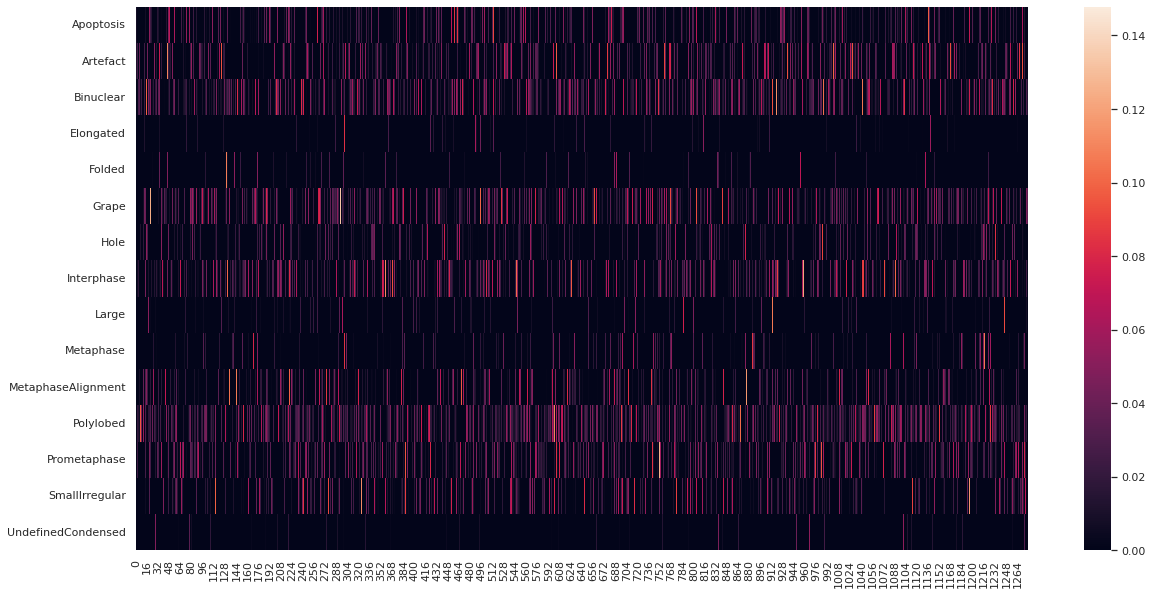

In [11]:
# display heatmap of average coefs
plt.figure(figsize=(20, 10))
ax = sns.heatmap(data=coefs.T)

/home/roshankern/anaconda3/envs/2.ML_phenotypic_classification/lib/python3.8/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


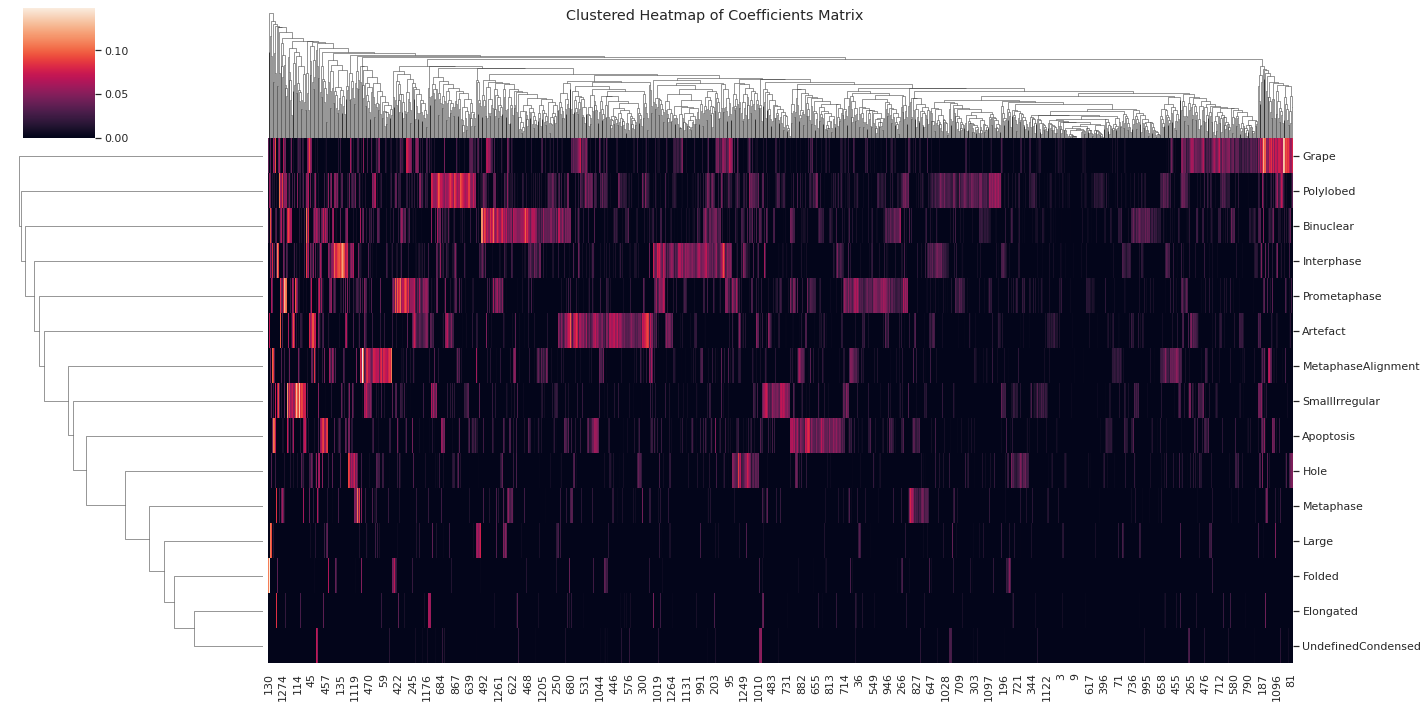

In [12]:
# display clustered heatmap of coefficients
ax = sns.clustermap(data=coefs.T, figsize=(20, 10), row_cluster=True, col_cluster=True)
ax = ax.fig.suptitle("Clustered Heatmap of Coefficients Matrix")

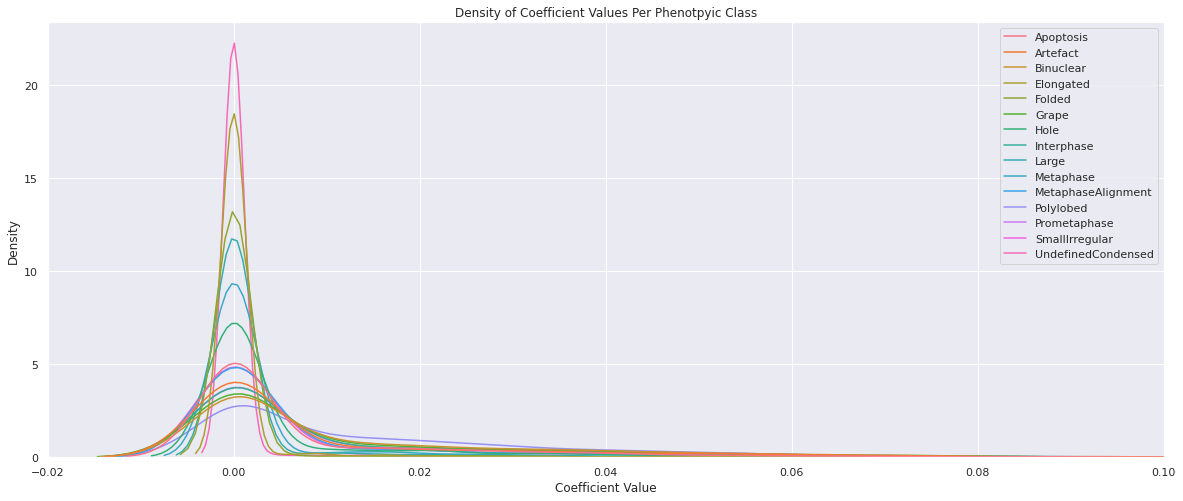

In [13]:
# display density plot for coefficient values of each class
sns.set(rc={"figure.figsize": (20, 8)})
plt.xlim(-0.02, 0.1)
plt.xlabel("Coefficient Value")
plt.ylabel("Density")
plt.title("Density of Coefficient Values Per Phenotpyic Class")
ax = sns.kdeplot(data=coefs)

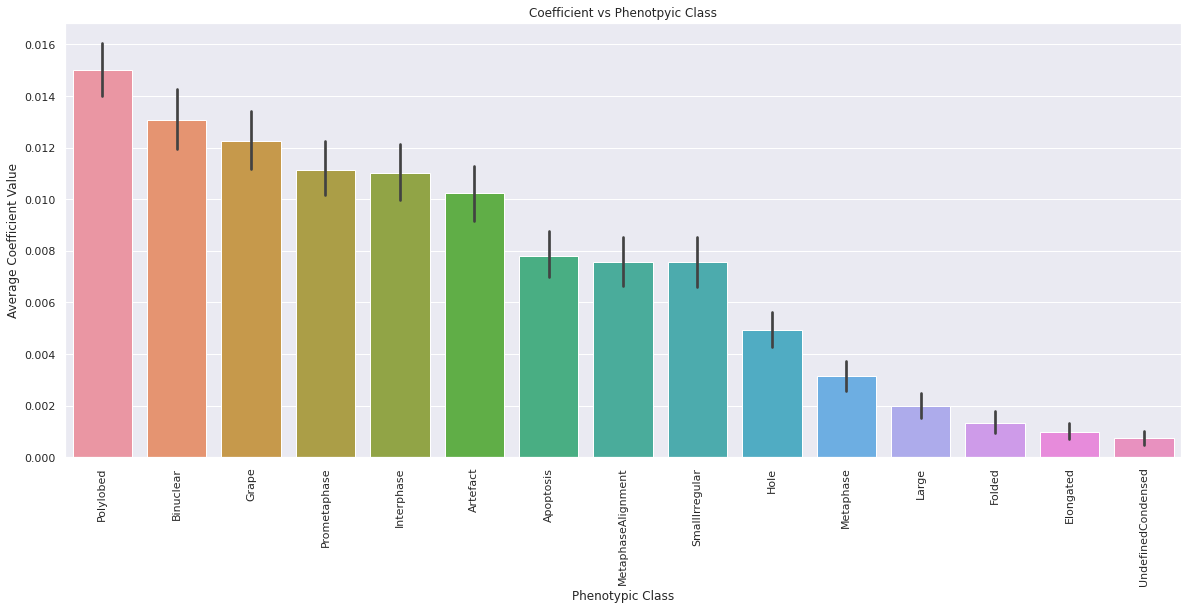

In [14]:
# display average coefficient value vs phenotypic class bar chart
pheno_class_ordered = coefs.reindex(
    coefs.mean().sort_values(ascending=False).index, axis=1
)
sns.set(rc={"figure.figsize": (20, 8)})
plt.xlabel("Phenotypic Class")
plt.ylabel("Average Coefficient Value")
plt.title("Coefficient vs Phenotpyic Class")
plt.xticks(rotation=90)
ax = sns.barplot(data=pheno_class_ordered)

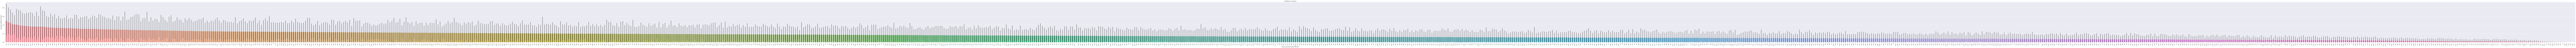

In [15]:
# display average coefficient value vs feature bar chart
feature_ordered = coefs.T.reindex(
    coefs.T.mean().sort_values(ascending=False).index, axis=1
)
sns.set(rc={"figure.figsize": (500, 8)})
plt.xlabel("Deep Learning Feature Number")
plt.ylabel("Average Coefficient Value")
plt.title("Coefficient vs Feature")
plt.xticks(rotation=90)
ax = sns.barplot(data=feature_ordered)